In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  # Normal Form mean 0 std 1
from sklearn.preprocessing import MinMaxScaler  # 0 - 1
from sklearn.preprocessing import LabelEncoder

Dataset: https://www.kaggle.com/rakeshrau/social-network-ads

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
print(len(dataset[(dataset['Gender']=='Male') & (dataset['Purchased']==1)]) / len(dataset))
print(len(dataset[(dataset['Gender']=='Female') & (dataset['Purchased']==1)]) / len(dataset))

0.165
0.1925


In [5]:
enc = LabelEncoder()
enc.fit(dataset['Gender'].values)
dataset['Gender_Encoded'] = enc.transform(dataset['Gender'].values)

In [6]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [7]:
X = dataset.iloc[:, [2, 3, 5]].values
y = dataset.iloc[:, 4].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                    random_state = 0)

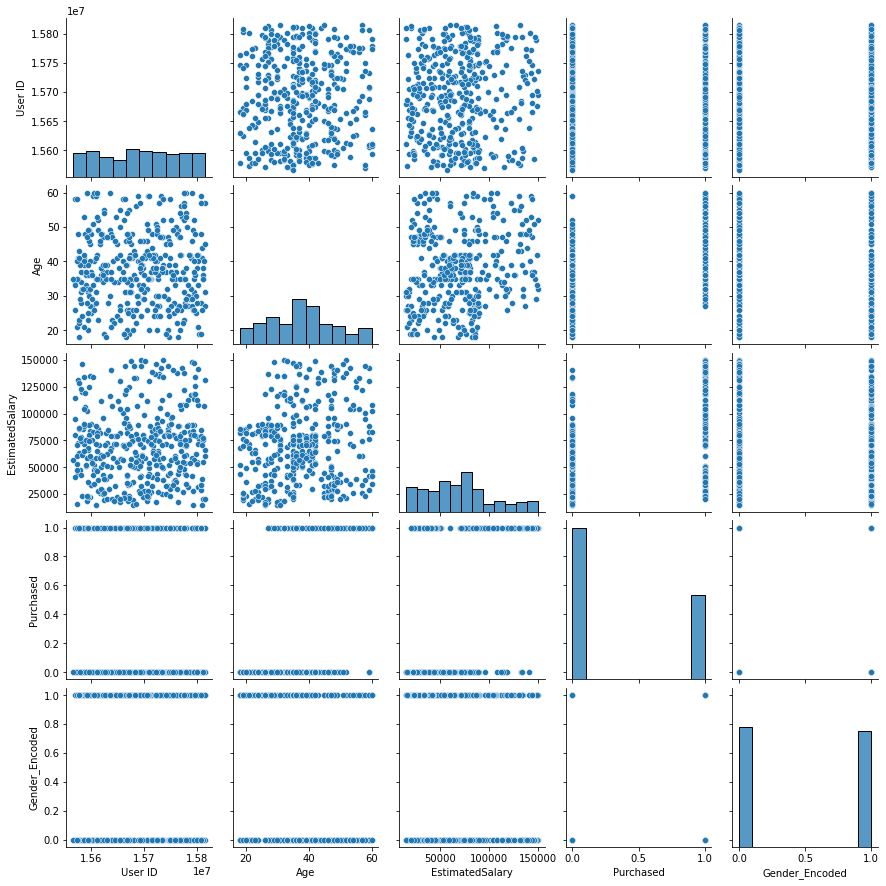

In [9]:
sns.pairplot(dataset);

In [10]:
sc = MinMaxScaler() # [0-1]
sc.fit(X_train.astype('float64'))

MinMaxScaler()

In [11]:
print(sc.data_max_)
print(sc.data_min_)

[6.0e+01 1.5e+05 1.0e+00]
[   18. 15000.     0.]


In [12]:
X_train = sc.transform(X_train) 
X_test = sc.transform(X_test)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
classifier.score(X_train, y_train)

0.92

In [15]:
classifier.score(X_test, y_test)

0.92

In [25]:
y_pred = classifier.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 4, 28]], dtype=int64)

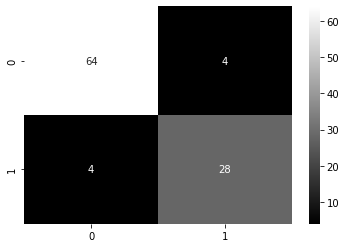

In [19]:
sns.heatmap(cm, cmap='gray', annot=True);

In [20]:
print("Train: ", classifier.score(X_train, y_train))
print("Test: ", classifier.score(X_test, y_test))

Train:  0.92
Test:  0.92


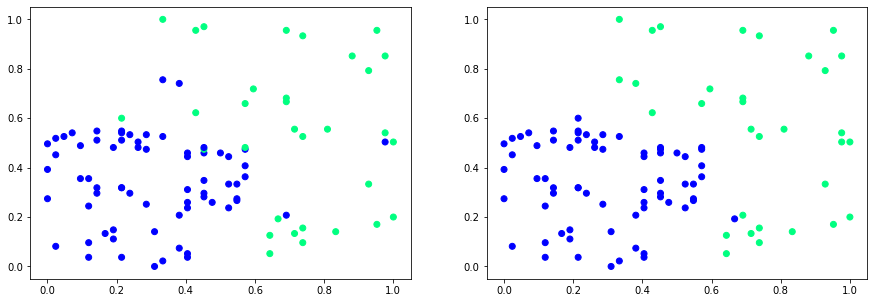

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
#sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test,)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='winter')

plt.subplot(122)
#sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred,)
plt.scatter(X_test[:,0], X_test[:, 1], c=y_pred, cmap='winter');